# Planning on an environment with an approximately circular obstacle in the middle.


In [1]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, box_2d_center, approxCircle
from panav.viz import draw_env
from panav.SAMP import Tube_Planning
from panav.util import unique_tx

import numpy as np
from matplotlib import pyplot as plt
from time import time
from tqdm import trange
import pickle as pkl




%load_ext autoreload
%autoreload 2

In [2]:
def flowtime(plan):
    return np.sum([t[-1] for t,x in plan])

## Create environment

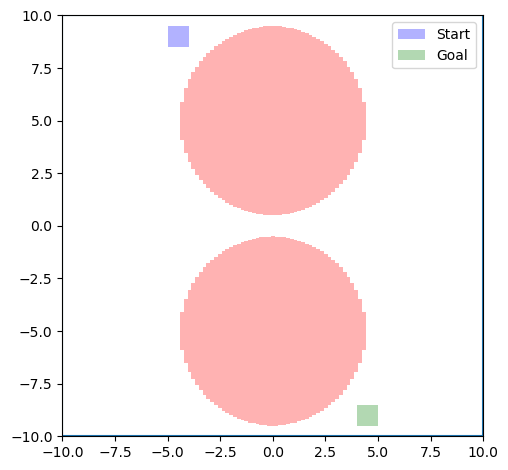

In [2]:
# 2D navigation environment

start_box_side = np.array([1.0,1.0])
goal_box_side = np.array([1.0,1.0])

top, bottom = 6,-6
start_x_offset = 7
goal_x_offset = 9
N = 3

start_locs = np.array([[-4.5,9.0]])
goal_locs = np.array([[4.5,-9.0]])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]




obstacles = []
R = 4.5

obstacles += approxCircle(np.array([0,5.0]),R)
obstacles += approxCircle(np.array([0,-5]),R)

env = NavigationEnv(limits,obstacles,starts,goals)

bloating_r = 0.5 
ax = plt.gca()
draw_env(env,show_agent_ID=False)

plt.tight_layout()

plt.savefig('./figures/circle_env.png')
plt.show()    

In [4]:
start = env.starts[0]
goal = env.goals[0]

vmax = 1.0
space_dim = 2
times = []
solutions = []

Ks = trange(3,21)

for K in Ks:
    # print("K",K)
    t0 = time()

    results = Tube_Planning(env,start,goal,vmax,bloating_r,\
                                [],\
                                space_dim,K)
    times.append(time()-t0)

    
    solutions.append(results)
    # print(times)
    # t,xs = unique_tx(t,xs)
    # print(t)
print(solutions)

  0%|          | 0/18 [07:10<?, ?it/s]  File "/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 945, in trace_dispatch
    self.do_wait_suspend(thread, frame, event, arg)
  File "/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydevd_bundle/pydevd_frame.py", line 164, in do_wait_suspend
    self._args[0].do_wait_suspend(*args, **kwargs)
  File "/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 1976, in do_wait_suspend
    keep_suspended = self._do_wait_suspend(thread, frame, event, arg, suspend_type, from_this_thread, frames_tracker)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2

KeyboardInterrupt: 

In [165]:

data = {'Ks':list(Ks),'times':times,'solutions':solutions}
with open('data.pkl','wb') as fp:
    pkl.dump(data,fp)

In [7]:
with open('data.pkl','rb') as fp:
    data = pkl.load(fp)

Ks = data['Ks']
times = data['times']
solutions = data['solutions']

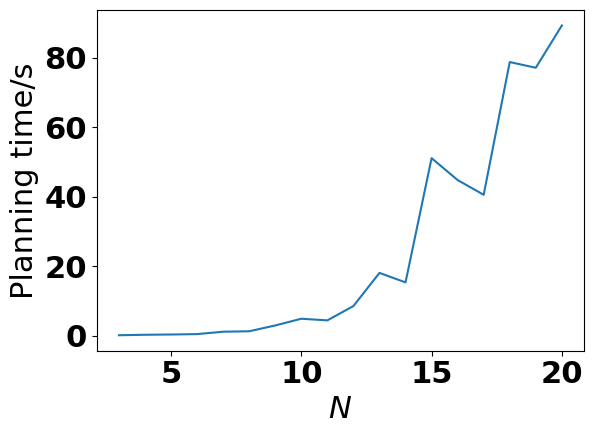

In [10]:
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.plot(list(Ks),times)
plt.xlabel(r'$N$')
plt.ylabel('Planning time/s')
plt.tight_layout()
plt.savefig('./figures/circle_planning_time.png')

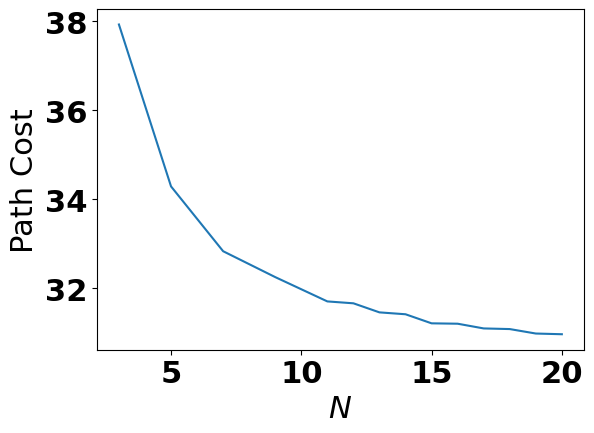

In [9]:
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.plot(list(Ks),[ts[-1] for ts,xs in solutions])
plt.xlabel(r'$N$')
plt.ylabel('Path Cost')
plt.tight_layout()
plt.savefig('./figures/circle_path_cost.png')

3 37.92666190382445 0.1875321865081787
4 36.10875101491959 0.3245110511779785
5 34.290840126014416 0.39470696449279785
6 33.563166602648025 0.5136392116546631
7 32.83549307589807 1.2004709243774414
8 32.544932837739395 1.3295352458953857
9 32.25437259619716 3.001392126083374
10 31.98150347974529 4.934883117675781
11 31.708634376173936 4.46343994140625
12 31.666226279379394 8.584357976913452
13 31.46261172166308 18.120324850082397
14 31.4202036281394 15.391486883163452
15 31.216589070418514 51.133490800857544
16 31.20805292690268 44.830960750579834
17 31.1020988999213 40.58679819107056
18 31.087761195957825 78.77377772331238
19 30.987608732618288 77.14166688919067
20 30.971805511239495 89.29905295372009


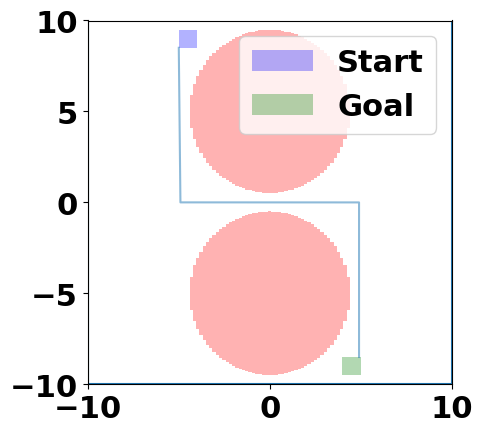

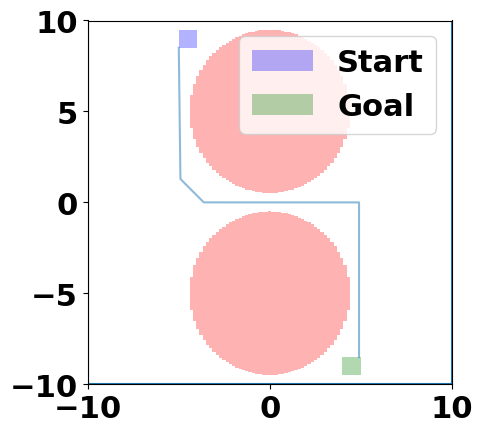

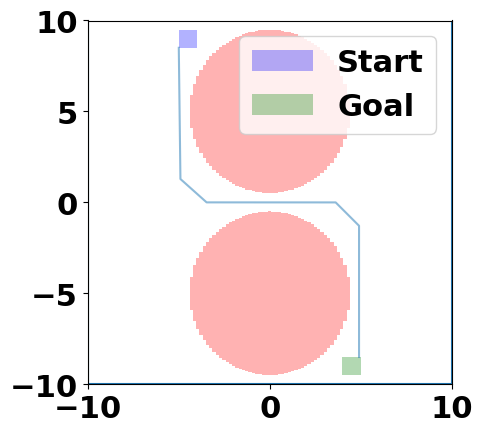

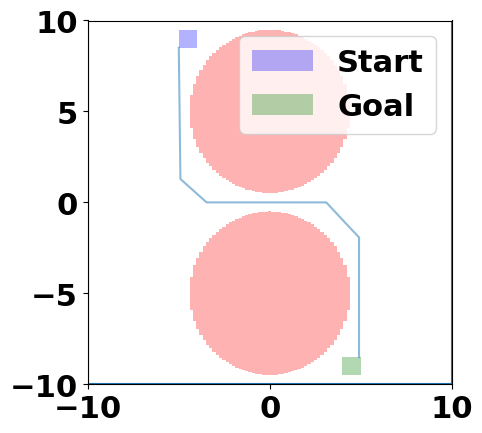

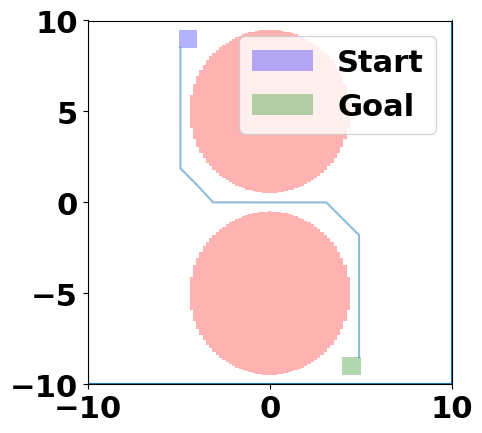

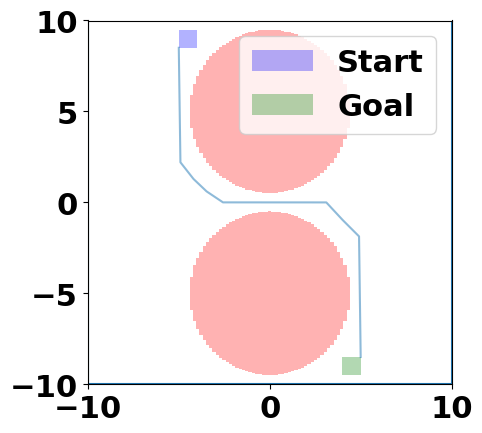

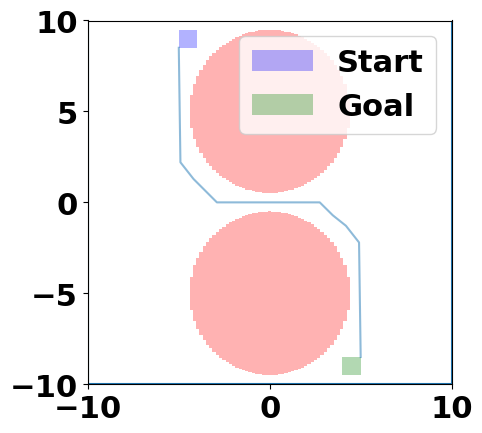

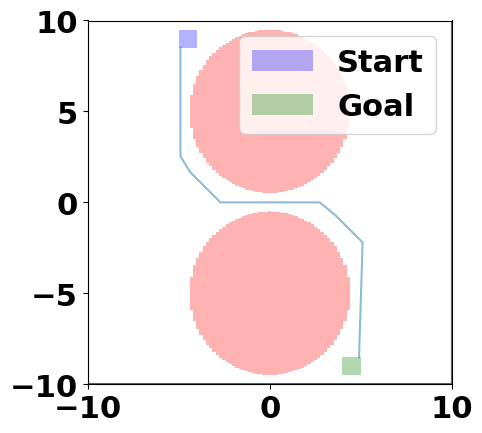

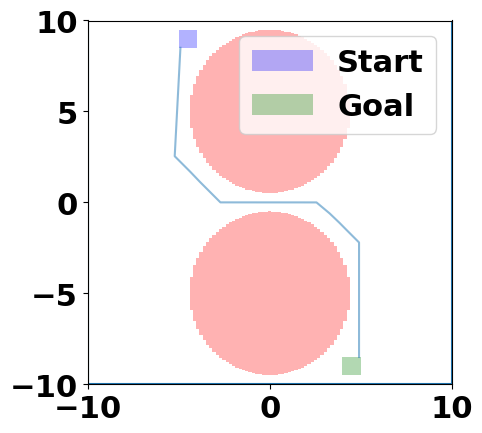

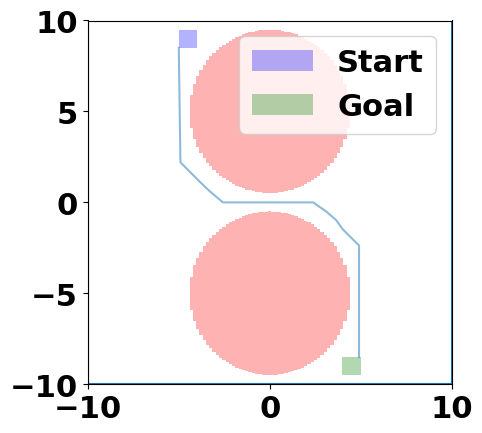

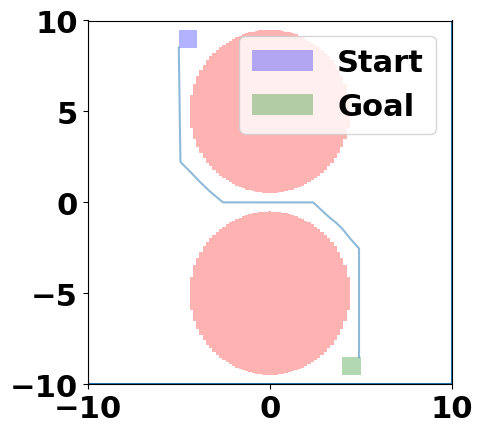

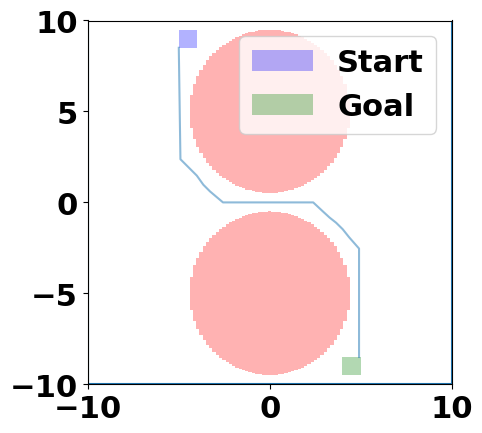

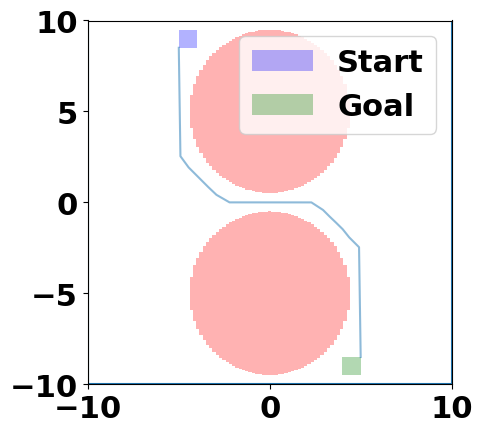

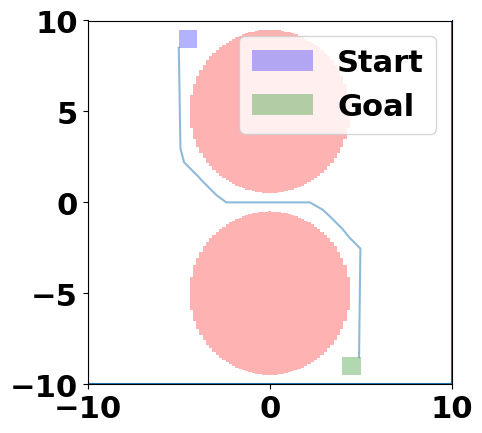

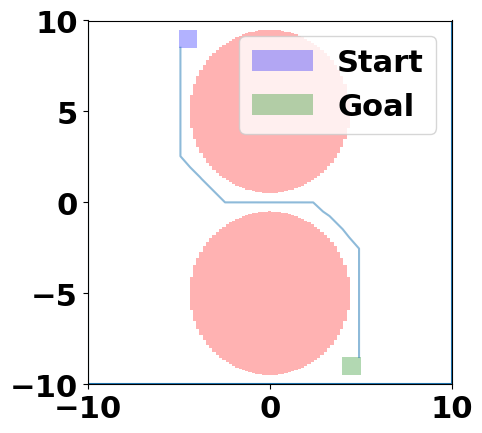

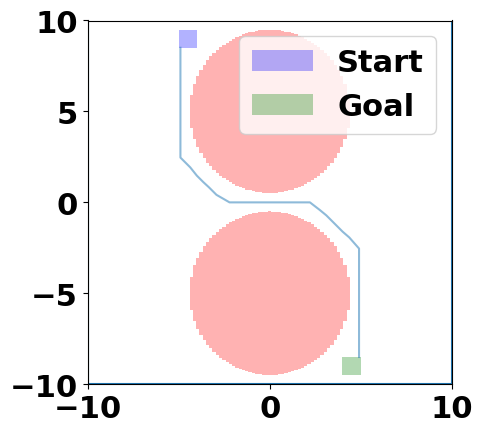

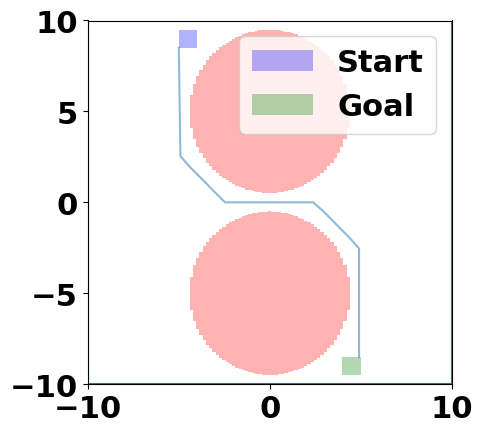

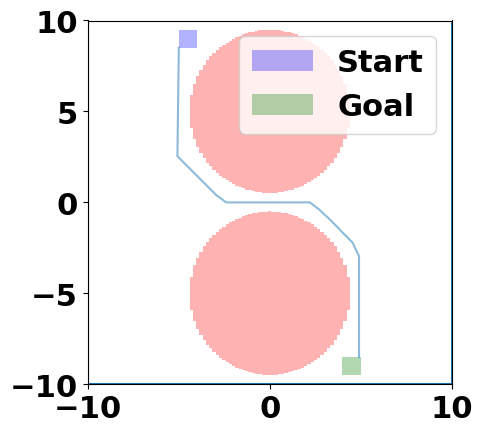

In [11]:
NK = len(list(Ks))
for i in range(NK):
    K = list(Ks)[i]
    print(K,solutions[i][0][-1],times[i])
    plt.figure()
    draw_env(env,[solutions[i][1]],plt.gca())
    plt.tight_layout()
    plt.savefig('./figures/circle_plan_N{}.png'.format(K))